# Data Collection

---



Since I couldn't find any appropriate premade datasets on kaggle and google dataset search, I decided to collect data on my own.

## 1. Scrape Google Images with SerpAPI

Here, I used SerpApi to collect and download Google images automatically. Make sure you register for SerpApi and have your API key ready for the following code.



In [ ]:
!pip install google-search-results

  Preparing metadata (setup.py) ... done
  Created wheel for google-search-results: filename=google_search_results-2.4.2-py3-none-any.whl size=32004 sha256=9d01f7afbe5a1b40b2010941d2445db2dc3c9f8508a847ec0a333955b4182738
  Stored in directory: /root/.cache/pip/wheels/d3/b2/c3/03302d12bb44a2cdff3c9371f31b72c0c4e84b8d2285eeac53
Successfully built google-search-results


In [ ]:
import os, requests, lxml, re, json, urllib.request
from serpapi.google_search import GoogleSearch
import requests
from PIL import Image
from io import BytesIO

def download_image(url, save_dir, base_name):
    try:
        # Send a GET request to the URL
        response = requests.get(url)
        response.raise_for_status()  # Check if the request was successful

        # Open the image using Pillow
        img = Image.open(BytesIO(response.content))

        # Ensure save_path has a proper file extension
        ext = img.format.lower()
        save_path = os.path.join(save_dir, f"{base_name}.{ext}")

        # Save the image
        img.save(save_path)
        print(f"Image successfully downloaded and saved to {save_path}")

    except requests.exceptions.RequestException as e:
        print(f"Error downloading image: {e}")
    except IOError as e:
        print(f"Error saving image: {e}")

def prep_image(keyword, file, hl, gl=None, start=None):
  params = {
    "q": f'{keyword}', # search query
    "tbm": "isch",                # image results
    "hl": hl,                   # language of the search
    "gl": gl,                   # country where search comes from
    "num": 200,
    "start": start,
    "api_key": # put your API key
  }

  search = GoogleSearch(params)
  results = search.get_dict()

  # List of image URLs
  image_urls = [image['original'] for image in results['images_results']]

  # Directory to save images
  save_dir = f"/your_directory/{file}"

  # Ensure the save directory exists
  os.makedirs(save_dir, exist_ok=True)

  # Download each image with a unique name
  for idx, image_url in enumerate(image_urls):
      base_name = f"{keyword}_{idx+101}"  # Unique base name for each image
      download_image(image_url, save_dir, base_name)


In [ ]:
keywords=['hydrangea quercifolia','hydrangea serrata','hydrangea macrophylla', 'climbing hydrangea']

In [ ]:
for keyword in keywords:
  prep_image(keyword, keyword, 'en')
prep_image('アジサイ　コンペイトウ', 'hydrangea konpeito','ja', 'jp')
#Since 'konpeito' shows better images when searching with Japanese, I used this setting.

## 2 Filter out questionable images

In [5]:
import tensorflow as tf
import os

In [ ]:
!pip install opencv-python

In [2]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [3]:
# Define the path to your dataset directory
data_dir = '/path/to/your/dataset/directory'

In [6]:
os.listdir(data_dir)

['hydrangea quercifolia',
 'hydrangea serrata',
 'hydrangea macrophylla',
 'hydrangea konpeito',
 '.ipynb_checkpoints',
 'climbing hydrangea']

In [ ]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [ ]:
for image_class in os.listdir(data_dir):
  print (image_class)

hydrangea quercifolia
hydrangea serrata
hydrangea macrophylla
climbing hydrangea
hydrangea konpeito
.ipynb_checkpoints


In [ ]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(data_dir, image_class, image)
    try:
      image = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print('Image not in ext list {}'.format(image_path))
        os.remove(image_path)
    except:
      print('Issue with image {}'.format(image_path))
      #os.remove(image_path)

## 3 Load Data

In [7]:
tf.data.Dataset.list_files

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None) -> 'DatasetV2'>

In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [10]:
data = tf.keras.utils.image_dataset_from_directory(data_dir, label_mode="categorical")
#generate shuffle, resize, etc.

Found 814 files belonging to 5 classes.


In [11]:
data_iterator = data.as_numpy_iterator()

In [12]:
batch = data_iterator.next()

In [13]:
print(len(batch) )
#returns 2: image and labels
print(batch[0].shape)
#Images represented as numbpy arrays

2
(32, 256, 256, 3)


In [14]:
batch[1] #labels

array([[0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

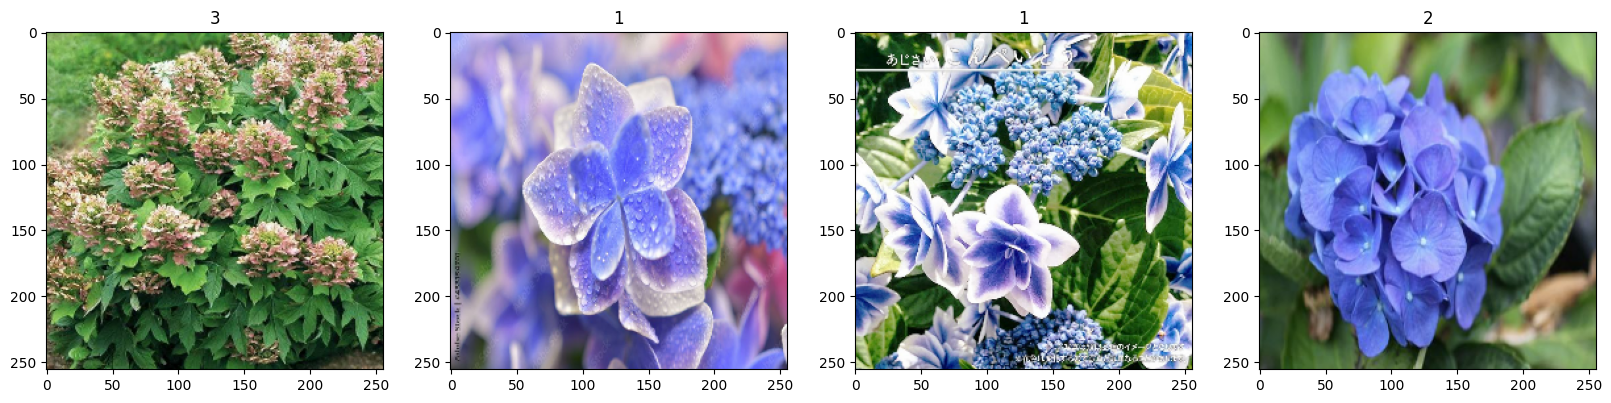

In [32]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].set_title(batch[1][idx].argmax())
